In [3]:
import numpy as np
import scipy.integrate
import sympy as sp
import matplotlib.pyplot as plt
import pypde

In [4]:
# Analytical solution has been solved using Sympy for linearised 1-D system. This linearisation is valid when the zeta potential
# at the wall is significantly lower than 4kT/Ze (i.e.) lower than 0.1V. In semiconductor physics, kT/e is also referred to as thermal voltage
# The full solution and the linearised solution have been plotted for z/lambda values of 0-5, the effect of the potential 
# and concentration profiles becomes negligible at larger distances. 

In [5]:
def analyticallinearsoln():
    v = sp.Function("\u03A8")
    z = sp.symbols("z")    
    c0 = sp.symbols("C_0")
    A = sp.symbols("A")
    epsilon = sp.symbols("\u03B5")
    epsilon0 = sp.symbols("\u03B5_0")
    e = sp.symbols("e")
    kb = sp.symbols("k_B")
    T = sp.symbols("T")
    B = sp.symbols("B")
    C2 = sp.symbols("C2")
    dl = sp.symbols("\u03BB")
    
    v0 = sp.symbols("\u03A8_0")

    
    eq = sp.Eq(v(z).diff(z,2) - A*B*v(z),0)
    sol = sp.dsolve(eq,ics={v(0):v0})
    
    sol = sol.subs(C2,0)
    
    sol = sol.subs(sp.sqrt(A*B),1/dl)

    return sol

analyticallinearsoln()


Eq(Ψ(z), Ψ_0*exp(-z/λ))

In [6]:
# The below function plots the full solution v/s the linearised solution for different values of zeta potential at the wall.
# The difference in the two solutions becomes more apparent as the wall zeta potential increases

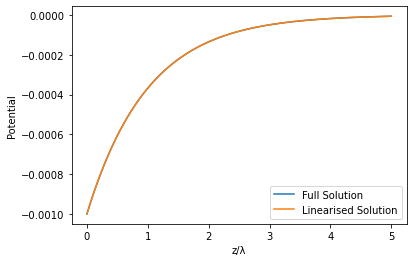

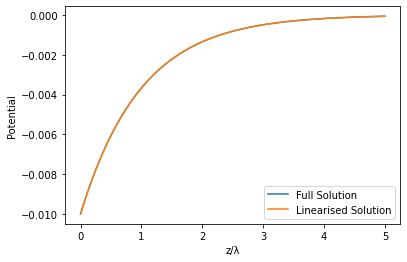

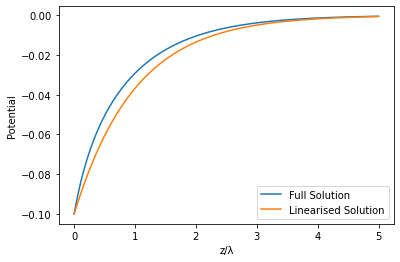

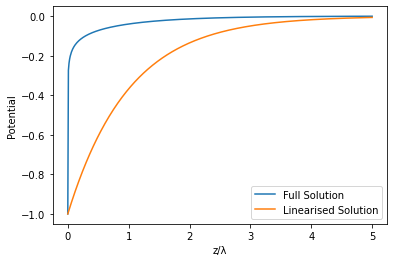

In [7]:
def plotsol(v0):
    z = np.linspace(0,5,500)
    fullsol = lambda x: 0.1035*np.arctanh(np.tanh(v0/0.1035)*np.exp(-x))
    v = fullsol(z)
    
    linsol = lambda x: v0*np.exp(-x)
    v2 = linsol(z)
    plt.plot(z,v)   
    plt.plot(z,v2)
    plt.legend(["Full Solution","Linearised Solution"])
    plt.xlabel("z/\u03BB")
    plt.ylabel("Potential")
    plt.show()
    
plotsol(-0.001)
plt.show()
plotsol(-0.01)
plt.show()
plotsol(-0.1)
plt.show()
plotsol(-1)
plt.show()

In [8]:
# The above plots are for different values of wall potential (zeta potential). The first two plots have the linearised solution
# and the full solution be almost exactly the same (these are both orders of magnitude less than Vt). For v0 = -0.1V and v0 = 1V
# the full solution decays much faster than the linearised solution

In [9]:
# The shooting method implementation in scipy.integrate.solve_bvp() requires you to have Dirichlet BCs on both sides
# However, the problem at hand has a Neumann BC at the end of the domain (x-> infinite, for numerical purposes, the last
# element of the x grid array). So, the BVP implementation in scipy can't be used to solve this. You actually get the same
# solution for the linearised model if you use the dirichlet boundary conditions on both sides, but it is wrong so I'd 
# rather not do it :P. The wrong BCs when used for the non linear equation basically neglects the effect of non-linearity on the
# profile


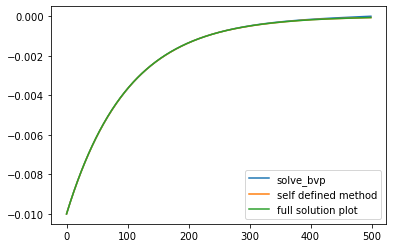

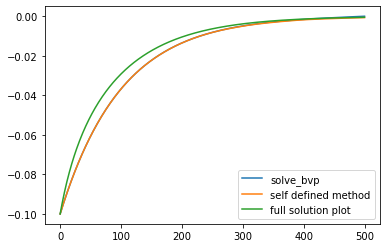

In [10]:
def eq(x,v):
    return np.array([v[1],v[0]])

def eq2(x,v):
    return np.array([v[1],np.sinh(v[0])])

def shootmenowplis(v0):
    
    x = np.linspace(0,5,500)
    
    bc = lambda va,vb : np.array([va[0] - v0, vb[0]])
    
    sol1 = scipy.integrate.solve_ivp(eq,(0,5),[v0,0],t_eval = x)
    sol2 = scipy.integrate.solve_ivp(eq,(0,5),[0,1],t_eval = x)
    
    factor = - sol1.y[1][-1]/sol2.y[0][-1]
    finsol = sol1.y + (factor*sol2.y)
    
    initguess = np.zeros((2,len(x)))
    initguess[0] = v0
    sol = scipy.integrate.solve_bvp(eq,bc,x,initguess)
    anotherone = scipy.integrate.solve_bvp(eq2,bc,x,initguess)
    
    fullsol = lambda z: 0.1035*np.arctanh(np.tanh(v0/0.1035)*np.exp(-z))
    v = fullsol(x)
    
    plt.plot(sol.y[0])
#     plt.plot(anotherone.y[0])

    plt.plot(finsol[0])
    plt.plot(v)
    
    plt.legend(["solve_bvp","self defined method","full solution plot"])
    plt.show()

    return
    
shootmenowplis(-0.01)
shootmenowplis(-0.1)

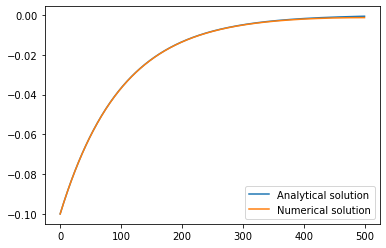

In [12]:
def findAmatrix(size):
    a = np.zeros((size,size))
    h = 5/size
    for i in range(1,size-1):
        a[i][i-1] = 1/(h*h)
        a[i][i] = -(2/(h*h))-1
        a[i][i+1] = 1/(h*h)
    
    a[0][0] = 1
    a[-1][-1] = 1
    a[-1][-2] = -1
    
    return a

def numerical1Dsol(v0):
    
    size = 500
    f = np.zeros(size)
    f[0] = v0
    a = findAmatrix(size)
    v = np.linalg.solve(a,f)
    
    z = np.linspace(0,5,500)
    linsol = lambda x: v0*np.exp(-x)
    v2 = linsol(z)
    plt.plot(v2)
    plt.plot(v)
    
    plt.legend(["Analytical solution","Numerical solution"])
    return
numerical1Dsol(-0.1)

In [ ]:
#linear model in 2D below


In [1]:
def findAmatrix(size):
    a = np.zeros((size,size))
    h = 5/size
    for i in range(1,size-1):
        a[i][i-1] = 1/(h*h)
        a[i][i] = -(2/(h*h))-1
        a[i][i+1] = 1/(h*h)
    
    a[0][0] = 1
    a[-1][-1] = 1
    a[-1][-2] = -1
    
    return a

def numerical2Dlinsol(v0):
    size = 500
    f = np.zeros(size)